<h>**National Basketball Association (2014-2015) shot log**<h>

In this project, I will be using the 'NBA shot logs' dataset from Kaggle, uploaded by DAN S BECKER. The author specifies that the data was sourced from NBA's Rest API.<br>
    
Here is a link to the webpage, from the dataset was sourced: https://www.kaggle.com/datasets/dansbecker/nba-shot-logs

Before we go into the premise of this project, let us take a look at the csv file itself, to get familiarized with the fields and values relevant to this analysis

GAME_ID: ID of the game (each game in the season is differentiated by its ID<br>
W: W - Win and L - Loss. Victory status of the shot taker's team.<br>
FINAL_MARGIN = Point differential between the two teams at the end of the game (how much did the winning team win by?)<br>
PERIOD: Each game has 4 quarters and the period denotes the quarter in which the shot was attempted. (PERIOD greater than 4 denotes OVERTIME - which is were the two teams were tied at the end of the 4th quarter, so they play an additional quarter)<br>
GAME_CLOCK: Time left in the game (represented as minutes:seconds)<br>
SHOT_CLOCK: Time left on the shot clock (per every possession, each team has 24 seconds to attempt a shot<br>
PTS_TYPE: 2 point shot or 3 point shot attempted?<br>
SHOT_RESULT: make or a miss?<br>
CLOSEST_DEFENDER: Name of the closest defender to the player attempting the shot<br>
CLOSE_DEF_DIST: Distance between the closest defender and the shot attemptor<br>
player_name: Name of the player attempting the shot


This dataset contains data about players shot statistics in the 2014-2015 season of the National Basketball Association (NBA). In this particular analysis, we will be studying the performance of players during what is commonly known as 'crunch time' in the game of basketball. Basketball is a very fast paced game, and the entire tide of the game can change within a two minute span. For this analysis, we will assume that the last two minutes of a game will be termed as 'crunch time', where players are under pressure to make shots, and prevent the other team from making shots at the same time.<br><br> 

In addition to defining crunch time by only looking at the last two minutes of the game-clock, we will set a few more conditions:<br>
1) A FINAL_MARGIN of 3: This means that at the end of the game, the difference between points for each team should be lesser than 3. This deontes a close game, highlighting the definition of 'crunch time'.<br>
2) SHOT_RESULT = made: The player has to have made the shot<br>
3) PERIOD > OR =4: The shot must be taken in the 4th, 5th, or 6th quarter (essentially at the end of the game<br>
4) Game Clock < 120 seconds: There must be only 2 minutes or less left in the game.<br>
<br><br>
    
For this projects, we will be using pandas to manipulate data in the csv by reading it into a dataframe.<br>

    This analysis can be divided into 5 major components:
    1) 2-point offensive crunch time performance
    2) 3-point offensive crunch time performance
    3) Overall offensice crunch time performance (both 2 and 3-pt)
    4) Defensive crunch time performance
    5) Made shots distribution during a game (through histograms)

In [210]:
import pandas as pd

In [188]:
df = pd.read_csv(r'shot_logs.csv')
df.head(n=5)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


**Filtering using the loc method based on the criterea declared above**

In [189]:
# Filtering out all records where the final point differential was within 5 points
df_clutch_2pt = df.loc[(df.FINAL_MARGIN<3)&(df.FINAL_MARGIN>(-3))&(df.PERIOD>=4)&(df.PTS_TYPE==2)&(df.SHOT_RESULT=='made')]
df_clutch_2pt

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
11,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,3,4,11:32,12.1,14,...,14.6,2,made,"Lin, Jeremy",202391,1.8,1,2,brian roberts,203148
12,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,4,4,8:55,4.3,2,...,5.9,2,made,"Hill, Jordan",201941,5.4,1,2,brian roberts,203148
52,21400768,"FEB 08, 2015 - CHA vs. IND",H,L,-1,12,4,5:40,22.0,0,...,5.0,2,made,"Hill, George",201588,4.3,1,2,brian roberts,203148
302,21400195,"NOV 23, 2014 - CHA @ MIA",A,L,-1,5,4,6:45,12.8,1,...,10.1,2,made,"Napier, Shabazz",203894,4.9,1,2,brian roberts,203148
313,21400160,"NOV 19, 2014 - CHA @ IND",A,L,-2,6,4,9:56,16.6,7,...,20.9,2,made,"Stuckey, Rodney",201155,3.6,1,2,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127582,21400720,"FEB 02, 2015 - BKN vs. LAC",H,W,2,11,4,0:03,NaN,7,...,17.7,2,made,"Jordan, DeAndre",201599,4.5,1,2,jarrett jack,101127
127744,21400539,"JAN 09, 2015 - BKN vs. PHI",H,L,-2,8,4,6:12,13.2,0,...,3.3,2,made,"Carter-Williams, Michael",203487,4.0,1,2,jarrett jack,101127
127839,21400432,"DEC 26, 2014 - BKN @ BOS",A,W,2,12,4,4:19,12.1,8,...,15.7,2,made,"Smart, Marcus",203935,2.2,1,2,jarrett jack,101127
127841,21400432,"DEC 26, 2014 - BKN @ BOS",A,W,2,14,4,0:29,14.6,11,...,13.3,2,made,"Smart, Marcus",203935,2.0,1,2,jarrett jack,101127


Here, we need a function to convert GAME_CLOCK (which is a string) into an integer. The part of the string before the ':' denotes the minutes, and the part after the ':' denotes the seconds. After some string manipulation, we convert this string into an integer which denotes the number of seconds.<br>
We can then insert this newly calculated field into the dataframe.

In [190]:
# Function to convert GAME_ClOCK to number of seconds left in the game
def game_clock_seconds(time):
    seconds = int(time[(time.index(":")+1):])
    mins = int(time[:time.index(":")])
    return ((60*mins)+(seconds))
# Creating a list to insert into the dataframe
game_clock = []
print(df_clutch_2pt)
print(df_clutch_2pt.iloc[:,7])
for i in df_clutch_2pt.iloc[:,7]:
    game_clock.append(game_clock_seconds(i))
#Now we can insert this column into the data frame
df_clutch_2pt.insert(6, "game_clock_s", game_clock, True)

         GAME_ID                     MATCHUP LOCATION  W  FINAL_MARGIN  \
11      21400890  MAR 03, 2015 - CHA vs. LAL        H  W             1   
12      21400890  MAR 03, 2015 - CHA vs. LAL        H  W             1   
52      21400768  FEB 08, 2015 - CHA vs. IND        H  L            -1   
302     21400195    NOV 23, 2014 - CHA @ MIA        A  L            -1   
313     21400160    NOV 19, 2014 - CHA @ IND        A  L            -2   
...          ...                         ...      ... ..           ...   
127582  21400720  FEB 02, 2015 - BKN vs. LAC        H  W             2   
127744  21400539  JAN 09, 2015 - BKN vs. PHI        H  L            -2   
127839  21400432    DEC 26, 2014 - BKN @ BOS        A  W             2   
127841  21400432    DEC 26, 2014 - BKN @ BOS        A  W             2   
127934  21400266  DEC 03, 2014 - BKN vs. SAS        H  W             2   

        SHOT_NUMBER  PERIOD GAME_CLOCK  SHOT_CLOCK  DRIBBLES  ...  SHOT_DIST  \
11                3       4    

In [191]:
df_clutch_2pt

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,game_clock_s,PERIOD,GAME_CLOCK,SHOT_CLOCK,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
11,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,3,692,4,11:32,12.1,...,14.6,2,made,"Lin, Jeremy",202391,1.8,1,2,brian roberts,203148
12,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,4,535,4,8:55,4.3,...,5.9,2,made,"Hill, Jordan",201941,5.4,1,2,brian roberts,203148
52,21400768,"FEB 08, 2015 - CHA vs. IND",H,L,-1,12,340,4,5:40,22.0,...,5.0,2,made,"Hill, George",201588,4.3,1,2,brian roberts,203148
302,21400195,"NOV 23, 2014 - CHA @ MIA",A,L,-1,5,405,4,6:45,12.8,...,10.1,2,made,"Napier, Shabazz",203894,4.9,1,2,brian roberts,203148
313,21400160,"NOV 19, 2014 - CHA @ IND",A,L,-2,6,596,4,9:56,16.6,...,20.9,2,made,"Stuckey, Rodney",201155,3.6,1,2,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127582,21400720,"FEB 02, 2015 - BKN vs. LAC",H,W,2,11,3,4,0:03,NaN,...,17.7,2,made,"Jordan, DeAndre",201599,4.5,1,2,jarrett jack,101127
127744,21400539,"JAN 09, 2015 - BKN vs. PHI",H,L,-2,8,372,4,6:12,13.2,...,3.3,2,made,"Carter-Williams, Michael",203487,4.0,1,2,jarrett jack,101127
127839,21400432,"DEC 26, 2014 - BKN @ BOS",A,W,2,12,259,4,4:19,12.1,...,15.7,2,made,"Smart, Marcus",203935,2.2,1,2,jarrett jack,101127
127841,21400432,"DEC 26, 2014 - BKN @ BOS",A,W,2,14,29,4,0:29,14.6,...,13.3,2,made,"Smart, Marcus",203935,2.0,1,2,jarrett jack,101127


Filtering out based on the last two mintues of the game, and dropping all NaN records.

In [192]:
# Setting 'crunch time' or 'clutch time' as two minutes and filtering out by win
df_clutch_2pt = df_clutch_2pt.loc[(df_clutch_2pt.game_clock_s<120)&(df_clutch_2pt.W == 'W')]
df_clutch_2pt = df_clutch_2pt.dropna()
df_clutch_2pt

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,game_clock_s,PERIOD,GAME_CLOCK,SHOT_CLOCK,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
1284,21400004,"OCT 29, 2014 - CHA vs. MIL",H,W,2,14,108,4,1:48,15.0,...,7.3,2,made,"Sanders, Larry",202336,3.7,1,2,al jefferson,2744
2099,21400004,"OCT 29, 2014 - CHA vs. MIL",H,W,2,11,46,5,0:46,6.3,...,6.6,2,made,"Middleton, Khris",203114,2.7,1,2,gary neal,202390
3357,21400004,"OCT 29, 2014 - CHA vs. MIL",H,W,2,26,7,5,0:07,1.6,...,22.8,2,made,"Knight, Brandon",202688,3.9,1,2,kemba walker,202689
5358,21400126,"NOV 14, 2014 - UTA @ NYK",A,W,2,18,36,4,0:36,14.9,...,17.4,2,made,"Anthony, Carmelo",2546,4.1,1,2,gordon hayward,202330
9882,21400508,"JAN 04, 2015 - LAL vs. IND",H,W,1,14,13,4,0:13,11.1,...,7.9,2,made,"Hill, Solomon",203524,2.3,1,2,kobe bryant,977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121585,21400234,"NOV 28, 2014 - MIN @ LAL",A,W,1,12,97,4,1:37,5.6,...,4.1,2,made,"Hill, Jordan",201941,3.3,1,2,mo williams,2590
123322,21400234,"NOV 28, 2014 - MIN @ LAL",A,W,1,13,61,4,1:01,9.5,...,5.3,2,made,"Hill, Jordan",201941,0.0,1,2,thaddeus young,201152
124186,21400266,"DEC 03, 2014 - BKN vs. SAS",H,W,2,16,20,4,0:20,6.9,...,21.9,2,made,"Duncan, Tim",1495,8.1,1,2,brook lopez,201572
126788,21400266,"DEC 03, 2014 - BKN vs. SAS",H,W,2,16,116,5,1:56,4.9,...,6.1,2,made,"Leonard, Kawhi",202695,2.3,1,2,joe johnson,2207


In [193]:
df_clutch_2pt['player_name'].value_counts().head(n=5)

john wall        9
mike conley      3
manu ginobili    3
zach randolph    3
mnta ellis       3
Name: player_name, dtype: int64

We can see the list of the top 5 players who displayed the most instances of 2-point clutch makes during the 2014-2015 NBA season.

Now let's perform the same process for 3-point shooting, and assess the top 5 players displaying the most instances of 3-point clutch makes.

In [194]:
df_clutch_3pt = df.loc[(df.FINAL_MARGIN<3)&(df.FINAL_MARGIN>(-3))&(df.PERIOD>=4)&(df.PTS_TYPE==3)&(df.SHOT_RESULT=='made')&(df.W=='W')]

In [195]:
game_clock=[]
print(df_clutch_3pt.iloc[:,7])
for i in df_clutch_3pt.iloc[:,7]:
    game_clock.append(game_clock_seconds(i))
#Now we can insert this column into the data frame
df_clutch_3pt.insert(7, "game_clock_s", game_clock, True)

1701       9:52
2123       4:47
3349       4:10
3353       0:03
4477       1:06
          ...  
126387     4:02
126389     0:50
127157    10:01
127474     5:56
127986     2:16
Name: GAME_CLOCK, Length: 150, dtype: object


In [196]:
df_clutch_3pt = df_clutch_3pt.loc[(df_clutch_3pt.game_clock_s<120)]
df_clutch_3pt = df_clutch_3pt.dropna()
df_clutch_3pt

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,game_clock_s,GAME_CLOCK,SHOT_CLOCK,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
4477,21400004,"OCT 29, 2014 - CHA vs. MIL",H,W,2,9,4,66,1:06,4.0,...,24.7,3,made,"Knight, Brandon",202688,6.8,1,3,marvin williams,101107
20727,21400871,"FEB 28, 2015 - ATL @ MIA",A,W,2,10,4,65,1:05,5.6,...,24.7,3,made,"Deng, Luol",2736,7.5,1,3,kent bazemore,203145
25179,21400463,"DEC 29, 2014 - WAS @ HOU",A,W,1,9,4,74,1:14,5.0,...,24.3,3,made,"Brewer, Corey",201147,14.3,1,3,paul pierce,1718
25268,21400302,"DEC 08, 2014 - WAS vs. BOS",H,W,1,12,5,40,0:40,15.6,...,24.6,3,made,"Bass, Brandon",101138,6.0,1,3,paul pierce,1718
49780,21400768,"FEB 08, 2015 - IND @ CHA",A,W,1,11,4,59,0:59,11.6,...,22.1,3,made,"Henderson, Gerald",201945,7.5,1,3,cj watson,201228
52788,21400789,"FEB 11, 2015 - BOS vs. ATL",H,W,1,13,4,101,1:41,12.3,...,24.4,3,made,"Horford, Al",201143,13.5,1,3,avery bradley,202340
52927,21400649,"JAN 23, 2015 - BOS @ DEN",A,W,1,10,4,86,1:26,15.0,...,24.2,3,made,"Nelson, Jameer",2749,3.1,1,3,avery bradley,202340
60825,21400002,"OCT 28, 2014 - SAS vs. DAL",H,W,1,15,4,69,1:09,4.8,...,25.1,3,made,"Nowitzki, Dirk",1717,6.4,1,3,tony parker,2225
75619,21400360,"DEC 15, 2014 - MIL @ PHX",A,W,2,7,4,30,0:30,12.8,...,25.3,3,made,"Bledsoe, Eric",202339,5.0,1,3,jared dudley,201162
82724,21400118,"NOV 13, 2014 - MEM vs. SAC",H,W,1,17,4,13,0:13,11.8,...,23.9,3,made,"Cousins, DeMarcus",202326,2.5,1,3,mike conley,201144


We make an immediate observation that the number of 3-pt clutch shoots was drastically lesser than the number of clutch 2-pt shoots during the 2014-2015 NBA season.

In [197]:
df_clutch_3pt['player_name'].value_counts().head(n=5)

mike conley        3
alan anderson      3
paul pierce        2
avery bradley      2
marvin williams    1
Name: player_name, dtype: int64

Finally we will take both types of shots into consideration, and take a look at the the top 5 clutch offensive players in the 2014-2015 NBA season

In [198]:
df_clutch_offense = df.loc[(df.FINAL_MARGIN<3)&(df.FINAL_MARGIN>(-3))&(df.PERIOD>=4)&(df.SHOT_RESULT=='made')&(df.W=='W')]
game_clock=[]
for i in df_clutch_offense.iloc[:,7]:
    game_clock.append(game_clock_seconds(i))
df_clutch_offense.insert(7, "game_clock_s", game_clock, True)


In [199]:
df_clutch_offense = df_clutch_offense.loc[(df_clutch_offense.game_clock_s<120)]
df_clutch_offense = df_clutch_offense.dropna()
df_clutch_offense['player_name'].value_counts().head(n=5)

john wall        9
mike conley      6
paul pierce      4
mnta ellis       3
alan anderson    3
Name: player_name, dtype: int64

An interesting observation is that Mike Conley has made sound contributions to his reputation as a crunch time player in both 3-pt and 2-pt shots. John wall leads overall simply because of his sheer number of clutch 2 point makes.

Now let us take a look at the defensive players who were able to make the offensive players miss during crunch time.

In [200]:
df_clutch_defense = df.loc[(df.FINAL_MARGIN<3)&(df.FINAL_MARGIN>(-3))&(df.PERIOD>=4)&(df.SHOT_RESULT=='missed')&(df.W=='L')&(df.CLOSE_DEF_DIST<=1.5)]
df_clutch_defense = df_clutch_defense.dropna()
game_clock=[]
for i in df_clutch_defense.iloc[:,7]:
    game_clock.append(game_clock_seconds(i))
df_clutch_defense.insert(7, "game_clock_s", game_clock, True)


Since there was a tie for all defenisive plays within the last two minutes, the game_clock filter was set to less than 180 seconds (3 minutes).

In [201]:
df_clutch_defense = df_clutch_defense.loc[(df_clutch_defense.game_clock_s<180)]
df_clutch_defense['CLOSEST_DEFENDER'].value_counts().head(n=5)

Randolph, Zach     3
Gasol, Marc        2
Duncan, Tim        2
Turner, Evan       2
Hayward, Gordon    2
Name: CLOSEST_DEFENDER, dtype: int64

VIZUALIZATIONS:

Let's start to look at some vizualizations that demistify a few trends
Begenning with a fundamental concept, let us take a look at a histogram that gives us an idea of when most 2-point shots are made during a game (in the 2014-2015 season)


In [202]:
import numpy as np
import matplotlib.pyplot as plt

df_2pt = df.loc[(df.PTS_TYPE==2)&(df.SHOT_RESULT=='made')]
game_clock=[]

for i in df_2pt.iloc[:,7]:
    game_clock.append(game_clock_seconds(i))
df_2pt.insert(7, "game_clock_s", game_clock, True)


In [203]:
histcoor = df_2pt.iloc[:,7]
histcoor
max(histcoor)

720

Text(0.5, 1.0, 'Frequency of 2-point shot makes during the game')

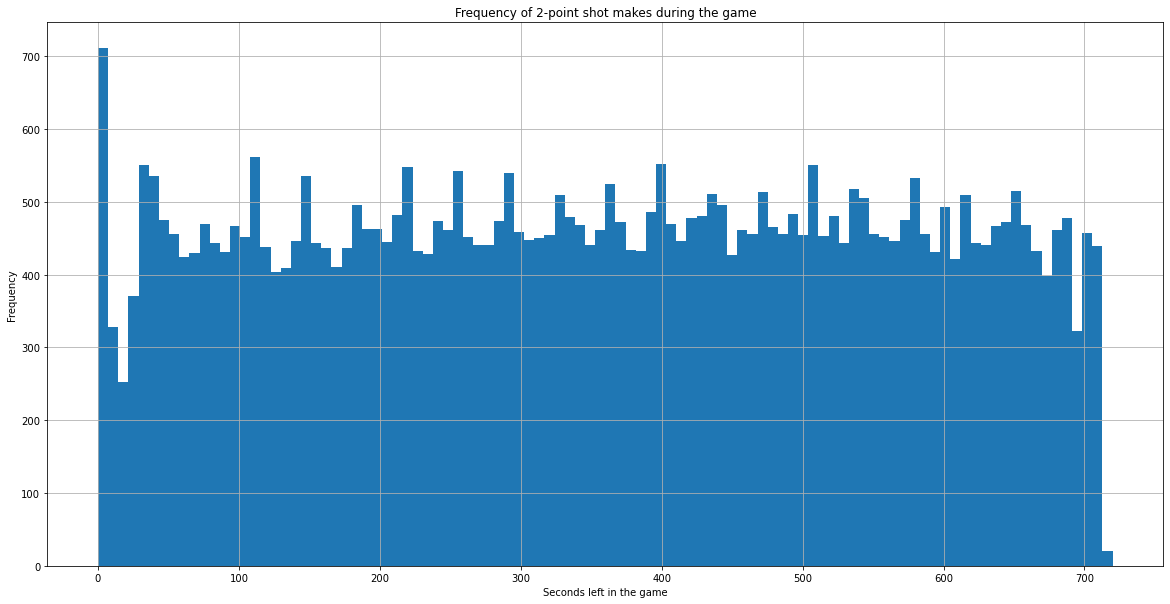

In [204]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
n, bins, patches = plt.hist(histcoor, 100)
plt.grid(True)
plt.xlabel('Seconds left in the game')
plt.ylabel('Frequency')
plt.title('Frequency of 2-point shot makes during the game')



We see that most shots that were made were actually attempted very close to the end of the game during the 2014-2015 NBA season

Let us now do the same for 3-pt shots, to see if there is any difference

In [205]:
df_3pt = df.loc[(df.PTS_TYPE==3)&(df.SHOT_RESULT=='made')]
game_clock=[]

for i in df_3pt.iloc[:,7]:
    game_clock.append(game_clock_seconds(i))
df_3pt.insert(7, "game_clock_s", game_clock, True)

In [206]:
histcoor = df_3pt.iloc[:,7]
histcoor

15        638
18        629
23        332
25        613
41        358
         ... 
127831      3
127869    156
127920    450
127986    136
128003    375
Name: game_clock_s, Length: 11915, dtype: int64

Text(0.5, 1.0, 'Frequency of 3-point shot makes during the game')

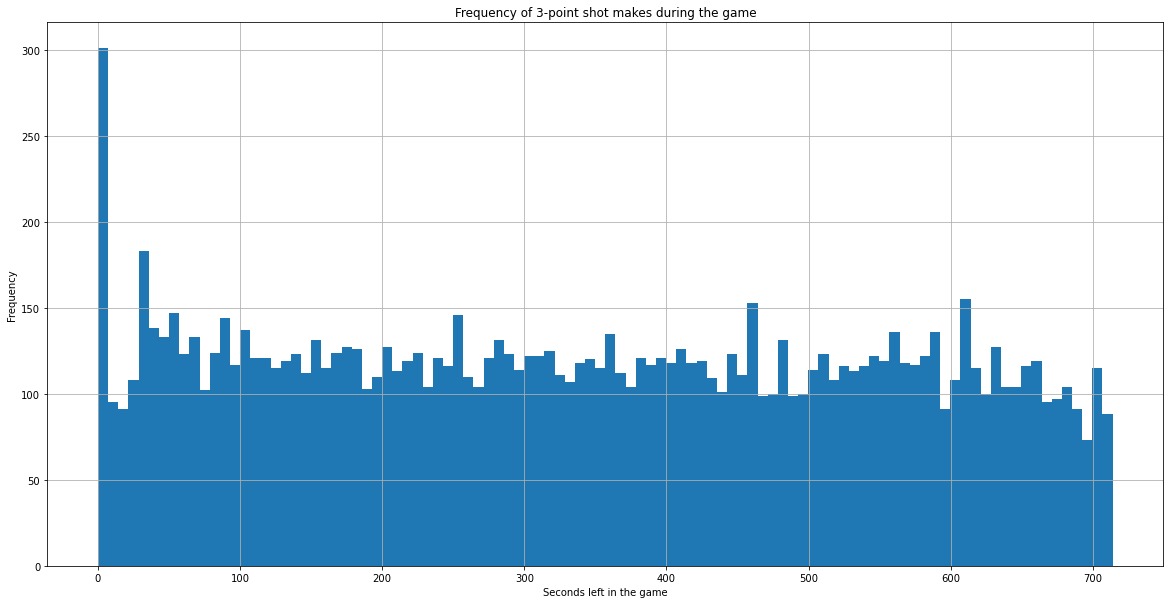

In [207]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
n, bins, patches = plt.hist(histcoor, 100)
plt.grid(True)
plt.xlabel('Seconds left in the game')
plt.ylabel('Frequency')
plt.title('Frequency of 3-point shot makes during the game')

Now that we have general information about shot distribution based on time, we can see that most makes (both 3-pt and 2-pt) are made very close to the end of the game. Let us vizualize this smaller windoe (crunch-time window) to seek more further insights.

Begenning with 2-pt shots

Text(0.5, 1.0, 'Frequency of 2-point shot makes during the last two minutes of the game')

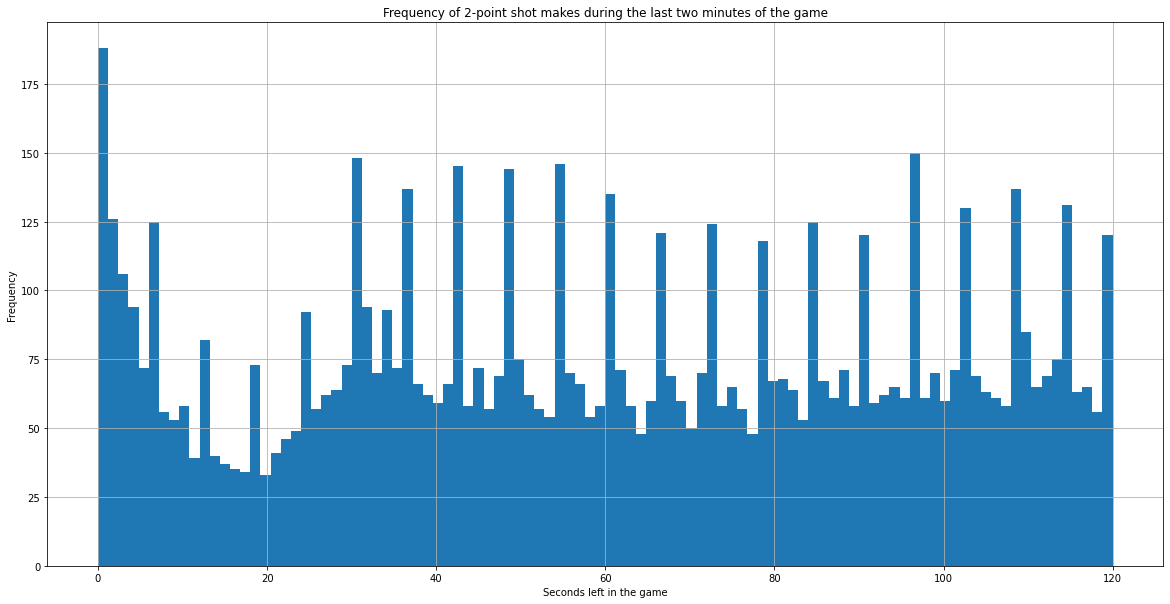

In [208]:
df_2pt = df_2pt.loc[df_2pt.game_clock_s<=120]
histcoor = df_2pt.iloc[:,7]
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
n, bins, patches = plt.hist(histcoor, 100)
plt.grid(True)
plt.xlabel('Seconds left in the game')
plt.ylabel('Frequency')
plt.title('Frequency of 2-point shot makes during the last two minutes of the game')

Now that we have a window into shot make distribution during the last 2 minutes, we see that there peaks evenly distributed throughout the last two minutes



Text(0.5, 1.0, 'Frequency of 3-point shot makes during the last two minutes of the game')

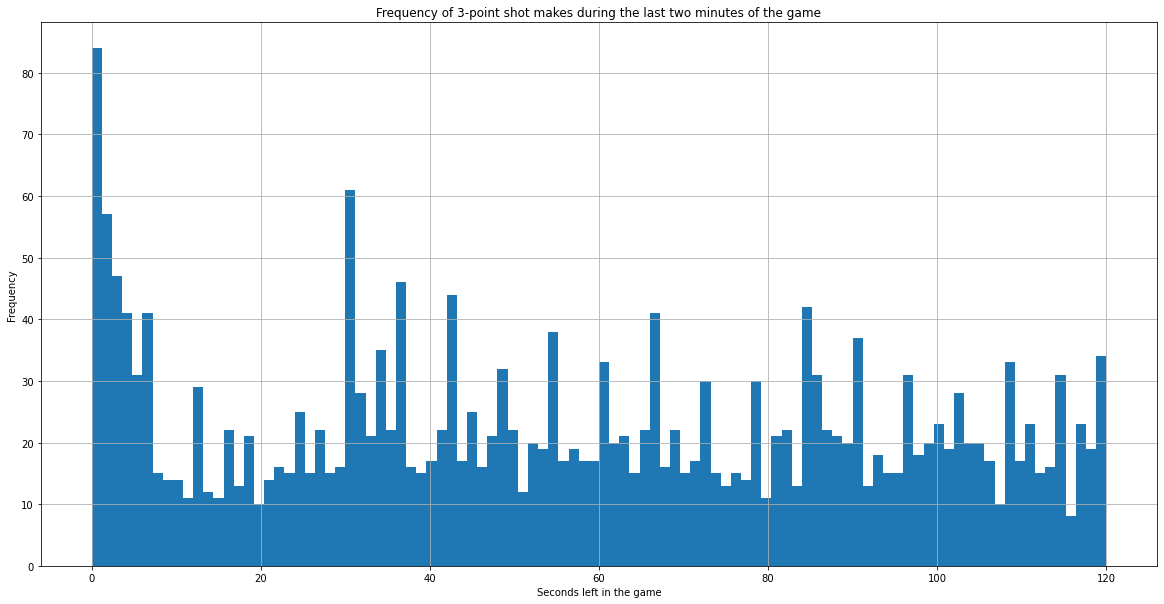

In [209]:
df_3pt = df_3pt.loc[df_3pt.game_clock_s<=120]
histcoor = df_3pt.iloc[:,7]
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
n, bins, patches = plt.hist(histcoor, 100)
plt.grid(True)
plt.xlabel('Seconds left in the game')
plt.ylabel('Frequency')
plt.title('Frequency of 3-point shot makes during the last two minutes of the game')